In [1]:
import numpy as np
import torch
import networkx as nx
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [10]:
a = np.tile([1, 2, 3, 4], (4, 1))
a += np.arange(4).reshape(-1, 1)
for line in a:
	print(line)

[1 2 3 4]
[2 3 4 5]
[3 4 5 6]
[4 5 6 7]


In [9]:
torch.unsqueeze(torch.tensor([1, 2, 4]), 1).shape

torch.Size([3, 1])

In [8]:

hidden_channels= 5 * [6]
hidden_channels.append(7)
hidden_channels

[6, 6, 6, 6, 6, 7]

In [3]:
a = [1 for _ in range(1)]
a

[1]

In [6]:
arr = np.array([1, 2, 4, 4])
print(np.sum([arr == np.max(arr)]))


2


In [2]:
from algorithms import faulty_stochastic_opt

In [11]:
ideal_labels = np.array([
	[1, 0, 0],
	[0, 1, 0],
	[0, 1, 0],
	[0, 0, 1],
])
faulty_stochastic_opt(ideal_labels, 0.5, np.random.default_rng(2))

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [2]:
test = np.arange(6)
elems = [1, 2, 2, 4]
test[elems]

array([1, 2, 2, 4])

0.25


array([[0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

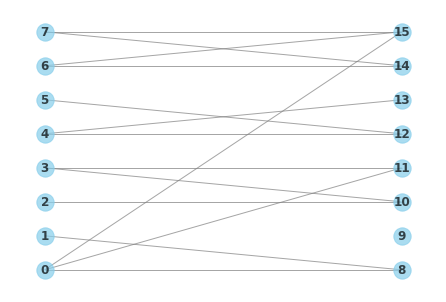

In [2]:
from instance_generator import _sample_partitioned_graph

rng = np.random.default_rng(10)
p = 0.5
m = 8
n = 8
k = 4
eps = 0.1

kwargs = {'p': p, 'k': k, 'eps': eps}

adj = _sample_partitioned_graph(m, n, rng, **kwargs)
mat = np.zeros((m+n, m+n))
mat[:m, -n:] = adj
mat[-n:, :m] = adj.T

# Create a graph from the adjacency matrix
graph = nx.Graph(mat)

# Draw the graph
# pos = nx.spring_layout(graph)  # You can choose different layout algorithms
pos = nx.bipartite_layout(graph, np.arange(m))  # You can choose different layout algorithms
nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='gray', alpha=0.7)
# plt.savefig(f"data/sparse_er_eps_{eps}.png")
plt.show()

{0: array([0.26161213, 0.29849114]), 1: array([0.81422574, 0.09191594]), 2: array([0.60010053, 0.72856053]), 3: array([0.18790107, 0.05514663]), 4: array([0.27496937, 0.65743301]), 5: array([0.56226566, 0.15006226]), 6: array([0.43263079, 0.6692973 ]), 7: array([0.42278467, 0.6331844 ]), 8: array([0.96743595, 0.68306482]), 9: array([0.39162483, 0.18725257]), 10: array([0.34596067, 0.51106597]), 11: array([0.89120941, 0.77556394]), 12: array([0.3181466, 0.9242169]), 13: array([0.47090989, 0.69375884]), 14: array([0.10720731, 0.10454356]), 15: array([0.20190745, 0.88444967])}


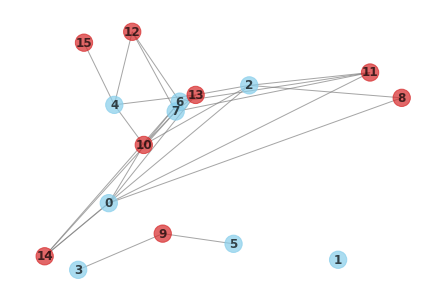

In [16]:
# visualize the FEAT graphs
from instance_generator import _sample_feature_bipartite_graph
rng = np.random.default_rng(2)

m = 8
n = 8
q = 0.6

kwargs = {
	  'q': q,
	  'ret_features': True
	}


adj, M, N = _sample_feature_bipartite_graph(m, n, rng, **kwargs)
mat = np.zeros((m+n, m+n))
mat[:m, -n:] = adj
mat[-n:, :m] = adj.T

graph = nx.Graph(mat)

color_map = []
for node in graph:
    if node < m:
        color_map.append('skyblue')
    else: 
        color_map.append('tab:red') 

positions = np.vstack([M[:, :2], N[:, :2]])
pos = {node: positions[node] for node in range(m+n)}
print(pos)
nx.draw(graph, pos, node_color = color_map, with_labels=True, font_weight='bold', edge_color='gray', alpha=0.7)
plt.savefig(f"data/FEAT_dot_prod_2d_{q}.png")
plt.show()